# План работы

1. Получение данных
2. Подготовка данных
3. Исследовательский анализ
4. Гипотезы
5. Общие выводы

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Гипотезы" data-toc-modified-id="Гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Гипотезы</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Изучение данных из файлов

<div style="border:solid blue 2px; padding: 20px">

Импортируем библиотеки
</div>

In [1]:
# импорт библиотек
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<div style="border:solid blue 2px; padding: 20px">
    
Методом `read_csv()` прочитаем `users.csv` и сохраним в переменную `data_users`:
    
</div>

In [2]:
# чтение файла с данными и сохранение в data_users
# метод try-except поможет загрузить данные локально или глобально
try:
    data_users = pd.read_csv('C:/Users/users.csv')  # Локальный путь
except:
    data_users = pd.read_csv('/datasets/users.csv')  # Серверный путь

<div style="border:solid blue 2px; padding: 20px">
    
`head()` выводим на экран первые пять строк таблицы:
    </div>

In [3]:
# получение первых 5 строк таблицы
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<div style="border:solid blue 2px; padding: 20px">
    
`info()` получим общую информацию о таблице:
    </div>

In [4]:
# получение общей информации о данных в таблице
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<div style="border:solid blue 2px; padding: 20px">

    
Создадим функцию с именем `show(data)` c параметром `data`,
    
в теле функции циклом проходим по всем колонкам.    
    
Методом `unique()` получаем уеикальные значения всех колонок и  
    
`value_counts()` смотрим на количество каждого признака .
        
    
</div> 

In [5]:
# функция для вывода информации по признакам
def show(data):
    for column in data.columns:
        print('Список уникальных', column)
        print()
        print(data[column].unique())
        print()
        print(data[column].value_counts())
        print()

In [6]:
# вывод данных
show(data_users)

Список уникальных user_id

[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191

<div style="border:solid blue 2px; padding: 20px">
    

**Таблица `users` (информация о пользователях)**:
    
`user_id` — уникальный идентификатор пользователя
    
`first_name` — имя пользователя
    
`last_name` — фамилия пользователя
    
`age` — возраст пользователя (годы)
    
`reg_date` — дата подключения тарифа (день, месяц, год)
    
`churn_date` — дата прекращения пользования тарифом 
    
(если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    
`city` — город проживания пользователя
    
`tarif` — название тарифного плана
    

**Категориальные** - `user_id`, `churn_date`, `city`, `first_name`, `last_name`, `reg_date`, `tariff`
    
    
**Количественные** - `age`
    
    
    
    
- Пропуски `churn_date` обнаружены `NaN`, указывают на активный и действующий тариф
    

    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
Методом `read_csv()` прочитаем `calls.csv` и сохраним в переменную `data_calls`:
    
</div>

In [7]:
# чтение файла с данными и сохранение в data_calls
# метод try-except поможет загрузить данные локально или глобально
try:
    data_calls = pd.read_csv('C:/Users/calls.csv')  # Локальный путь
except:
    data_calls = pd.read_csv('/datasets/calls.csv')  # Серверный путь

<div style="border:solid blue 2px; padding: 20px">
    
`head()` выводим на экран первые пять строк таблицы:
    </div>

In [8]:
# получение первых 5 строк таблицы
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<div style="border:solid blue 2px; padding: 20px">
    
`info()` получим общую информацию о таблице:
    </div>

In [9]:
# получение общей информации о данных в таблице
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
# вывод данных
show(data_calls)

Список уникальных id

['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']

1023_63     1
1113_187    1
1311_16     1
1408_59     1
1382_821    1
           ..
1303_110    1
1054_250    1
1382_574    1
1310_245    1
1435_339    1
Name: id, Length: 202607, dtype: int64

Список уникальных call_date

['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '

<div style="border:solid blue 2px; padding: 20px">
    

**Таблица `calls` (информация о звонках)**:
    
`id` — уникальный номер звонка
    
`call_date` — дата звонка
    
`duration` — длительность звонка в минутах
    
`user_id` — идентификатор пользователя, сделавшего звонок
    

**Категориальные** - `id`, `call_date`, `user_id`   
    
**Количественные** - `duration`
    
    
    
    
- Артефакт обнаружена длительность звонка `duration` равная `0` в количестве `39613`, 
    
  Причина появления технологическая.
    
  Возможно длительность звонка равна `0` появилась по разным причинам:
    
   `Звонок пропущенный` - абонент не взял трубку или сбросил при входящем вызове
    
   `Сработал автоответчик` и раз не было ответа абонента, то и время разговора получается нулевым
    
   `Проблемы с преобразованием данных о фиксации времени звонка` - вопрос к разработчикам
    
    
- Обнаружены значения в длительность звонка `duration` не соответсвующие условиям тарифа:
    
   «Мегалайн» всегда округляет вверх значения минут и мегабайтов. 

   Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута 
    
   Причина появления технологическая. Приведём значения в соответствии с условиями.
    
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
Методом `read_csv()` прочитаем `messages.csv` и сохраним в переменную `data_messages`:
    
</div>

In [11]:
# чтение файла с данными и сохранение в data_messages
# метод try-except поможет загрузить данные локально или глобально
try:
    data_messages = pd.read_csv('C:/Users/messages.csv')  # Локальный путь
except:
    data_messages = pd.read_csv('/datasets/messages.csv')  # Серверный путь

<div style="border:solid blue 2px; padding: 20px">
    
`head()` выводим на экран первые пять строк таблицы:
    </div>

In [12]:
# получение первых 5 строк таблицы
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<div style="border:solid blue 2px; padding: 20px">
    
`info()` получим общую информацию о таблице:
    </div>

In [13]:
# получение общей информации о данных в таблице
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
# вывод данных
show(data_messages)

Список уникальных id

['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']

1330_402    1
1478_82     1
1344_63     1
1431_786    1
1401_322    1
           ..
1035_238    1
1244_175    1
1422_38     1
1251_768    1
1217_425    1
Name: id, Length: 123036, dtype: int64

Список уникальных message_date

['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22

<div style="border:solid blue 2px; padding: 20px">
    

**Таблица `messages` (информация о сообщениях)**:
    

`id`— уникальный номер сообщения

`message_date` — дата сообщения
    
`user_id` — идентификатор пользователя, отправившего сообщение
    
    
**Категориальные** - `id`, `message_date`, `user_id`

    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
Методом `read_csv()` прочитаем `internet.csv` и сохраним в переменную `data_internet`:
    
</div>

In [15]:
# чтение файла с данными и сохранение в data_internet
# метод try-except поможет загрузить данные локально или глобально
try:
    data_internet = pd.read_csv('C:/Users/internet.csv')  # Локальный путь
except:
    data_internet = pd.read_csv('/datasets/internet.csv')  # Серверный путь

<div style="border:solid blue 2px; padding: 20px">
    
`head()` выводим на экран первые пять строк таблицы:
    </div>

In [16]:
# получение первых 5 строк таблицы
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<div style="border:solid blue 2px; padding: 20px">
    
`info()` получим общую информацию о таблице:
    </div>

In [17]:
# получение общей информации о данных в таблице
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [18]:
# вывод данных
show(data_internet)

Список уникальных Unnamed: 0

[     0      1      2 ... 149393 149394 149395]

2047     1
95620    1
40249    1
38200    1
60727    1
        ..
51916    1
62155    1
64202    1
58057    1
0        1
Name: Unnamed: 0, Length: 149396, dtype: int64

Список уникальных id

['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']

1042_117    1
1144_368    1
1394_225    1
1244_126    1
1114_160    1
           ..
1220_23     1
1142_474    1
1032_475    1
1051_146    1
1435_339    1
Name: id, Length: 149396, dtype: int64

Список уникальных mb_used

[ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

Список уникальных session_date

['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2

<div style="border:solid blue 2px; padding: 20px">
    

**Таблица `internet` (информация об интернет-сессиях)**:
    
`id` — уникальный номер сессии
    
`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
    
`session_date` — дата интернет-сессии
    
`user_id` — идентификатор пользователя
    
    
    
**Категориальные** - `id`, `session_date`, `user_id`   
    
**Количественные** - `mb_used`
    
    
    
    
- Артефакт обнаружен объём потраченного за сессию трафика `mb_used` равный `0` в количестве `19598`, 
    
  Причина появления технологическая.
    
  Трафик -  это поток цифровой информации, которая как отправляется, так и принимается 
    
  любым устройством, подключенным к сети интернет
    
  Возможно объём трафика равный `0` появилась по разным причинам:
    
   `Лимит превышен` - абонент установил ограничение мобильных данных на устройстве по трафику
    
   `Отсутствие онлайн активности` и раз не было потока, то и объём получается нулевым
    
   `Проблемы с преобразованием данных о фиксации потока` - вопрос к разработчикам
    
    
- Обнаружены значения в трафике `mb_used` не соответсвующие условиям тарифа:
    
   «Мегалайн» всегда округляет вверх значения минут и мегабайтов. 

   Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута 
    
   Причина появления технологическая. Приведём значения в соответствии с условиями.
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
Методом `read_csv()` прочитаем `tariffs.csv` и сохраним в переменную `data_tariffs`:
    
</div>

In [19]:
# чтение файла с данными и сохранение в data_tariffs
# метод try-except поможет загрузить данные локально или глобально
try:
    data_tariffs = pd.read_csv('C:/Users/tariffs.csv')  # Локальный путь
except:
    data_tariffs = pd.read_csv('/datasets/tariffs.csv')  # Серверный путь

<div style="border:solid blue 2px; padding: 20px">
    
`head()` выводим на экран первые пять строк таблицы:
    </div>

In [20]:
# получение первых 5 строк таблицы
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div style="border:solid blue 2px; padding: 20px">
    
`info()` получим общую информацию о таблице:
    </div>

In [21]:
# получение общей информации о данных в таблице
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [22]:
# вывод данных
show(data_tariffs)

Список уникальных messages_included

[  50 1000]

50      1
1000    1
Name: messages_included, dtype: int64

Список уникальных mb_per_month_included

[15360 30720]

30720    1
15360    1
Name: mb_per_month_included, dtype: int64

Список уникальных minutes_included

[ 500 3000]

3000    1
500     1
Name: minutes_included, dtype: int64

Список уникальных rub_monthly_fee

[ 550 1950]

550     1
1950    1
Name: rub_monthly_fee, dtype: int64

Список уникальных rub_per_gb

[200 150]

150    1
200    1
Name: rub_per_gb, dtype: int64

Список уникальных rub_per_message

[3 1]

3    1
1    1
Name: rub_per_message, dtype: int64

Список уникальных rub_per_minute

[3 1]

3    1
1    1
Name: rub_per_minute, dtype: int64

Список уникальных tariff_name

['smart' 'ultra']

ultra    1
smart    1
Name: tariff_name, dtype: int64



<div style="border:solid blue 2px; padding: 20px">
    

**Таблица `tariffs` (информация о тарифах)**:
    
`tariff_name` — название тарифа
    
`rub_monthly_fee` — ежемесячная абонентская плата в рублях
    
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
    
`messages_included` — количество сообщений в месяц, включённых в абонентскую плату
    
`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    
`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета 
    
 (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    
`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
    
`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета 
    
 (1 гигабайт = 1024 мегабайта)
    
    
**Категориальные** - `tariff_name`
    
**Количественные** - `messages_included`, `mb_per_month_included`, `minutes_included`, 
    
`rub_monthly_fee`, `rub_per_gb`, `rub_per_message`, `rub_per_minute`    
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
Посчитаем сколько строк являются дубликатами.
    
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
Методом `duplicated()` проверим данные на наличие дубликатов и посчитаем их `sum()`
    
</div>

In [23]:
# подсчет явных дубликатов
print('Всего строк дубликатов: ',data_users.duplicated().sum())

Всего строк дубликатов:  0


In [24]:
# подсчет явных дубликатов
print('Всего строк дубликатов: ',data_calls.duplicated().sum())

Всего строк дубликатов:  0


In [25]:
# подсчет явных дубликатов
print('Всего строк дубликатов: ',data_messages.duplicated().sum())

Всего строк дубликатов:  0


In [26]:
# подсчет явных дубликатов
print('Всего строк дубликатов: ',data_internet.duplicated().sum())

Всего строк дубликатов:  0


<div style="border:solid blue 2px; padding: 20px">
    
Получили отсутствие дубликатов по всем таблицам.
    
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
### Вывод    
    
**Оценка полученных данных**

Наблюдения, представленные в таблице описываются категориальными и количественными значениями.
    
Данные можно исследовать для выбора более прибыльного тарифа и корректировки рекламного бюджета:
    
Данные содержат проблемы (ошибки), которые могут привести написанный алгоритм работы к искаженным результатам.
    

**Проблемы и их возможные причины появления:**
    
    
    
Пропуски в **Категориальных** переменных.
    
- Пропуски `churn_date` обнаружены `NaN`, указывают на активный и действующий тариф
    
    
Уникальные значения в **Количественных** переменных.  
    
    
- Артефакт обнаружена длительность звонка `duration` равная `0` в количестве `39613`, 
    
  Причина появления технологическая.
    
  Возможно длительность звонка равна `0` появилась по разным причинам:
    
   `Звонок пропущенный` - абонент не взял трубку или сбросил при входящем вызове
    
   `Сработал автоответчик` и раз не было ответа абонента, то и время разговора получается нулевым
    
   `Проблемы с преобразованием данных о фиксации времени звонка` - вопрос к разработчикам
    

- Артефакт обнаружен объём потраченного за сессию трафика `mb_used` равный `0` в количестве `19598`, 
    
  Причина появления технологическая.
    
  Трафик -  это поток цифровой информации, которая как отправляется, так и принимается 
    
  любым устройством, подключенным к сети интернет
    
  Возможно объём трафика равный `0` появилась по причине:
    
    
   `Проблемы с преобразованием данных о фиксации потока` - вопрос к разработчикам
    
    
  **Так же не стоит отвергать варианты:**
    
    
`Лимит превышен` - абонент установил ограничение мобильных данных на устройстве по трафику
    
`Отсутствие онлайн активности` и раз не было потока, то и объём получается нулевым
    
    
**ОТСУТСТВИЕ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ В ОСТАЛЬНЫХ ПРИЗНАКАХ ОБЛЕГЧАЕТ ПРЕДОБРАБОТКУ**
    

    
    
</div>

## Подготовка данных

<div style="border:solid blue 2px; padding: 20px">
    

**Заменим типы данных в следующих признаках:**
    
`data_users['reg_date']` `object` на `datatime`
    
`data_users['churn_date']` `object` на `datatime`
    
`data_calls['call_date']` `object` на `datatime`
    
`data_messages['message_date']` `object` на `datatime`
    
`data_internet['session_date']` `object` на `datatime`
    
    
`data_calls['duration']` `float64` на `int64`
    
`data_internet['mb_used']` `float64` на `int64`
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">

Создадим функцию с именем `changetype(data)` c параметром `data`,
    
в теле функции циклом проходим по названиям колонок и 

условная конструкция, которая ищет `date` в названии.    
    
Методом `to_datetime` заменим тип данных значений на `datetime`
    
</div>

In [27]:
#функция замены типа данных на datetime64
def changetype(data):
    for column in data.columns:
        if 'date' in column:
            data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')
    display(data)
changetype(data_users)
changetype(data_calls)
changetype(data_messages)
changetype(data_internet)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<div style="border:solid blue 2px; padding: 20px">
    
Методом `astype` заменим тип данных на `int` и округлим вверх `np.ceil` передвав методом `apply`:
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
[Описание тарифа](#intro) содержит примечание, в котором указано округление `duration до 1мин` 
    
</div>

In [28]:
# замена типа данных и округление вверх
data_calls['duration'] = data_calls['duration'].apply(np.ceil).astype('int')

<div style="border:solid blue 2px; padding: 20px">
    
 
Добавим новый столбец с месяцем публикации объявления атрибутом `dt.month`

    
    
</div> 

In [29]:
# добавление нового столбца с месяцем
data_calls['month'] = data_calls['call_date'].dt.month
data_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` сделаем сводную таблицу для каждого пользователя  по месяцам
    
и посчитаем количество звонков `calls_count` и израсходованных минут `sum_calls_duration`
    
    
</div> 

In [30]:
# сделаем сводную таблицу
data_calls_pivot = pd.pivot_table(data_calls, index=['user_id', 'month'], values='duration', aggfunc=['count','sum'])
data_calls_pivot.columns = ['calls_count', 'sum_calls_duration']
data_calls_pivot.reset_index(inplace=True)
data_calls_pivot

,user_id,month,calls_count,sum_calls_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


<div style="border:solid blue 2px; padding: 20px">
    
 
Добавим новый столбец с месяцем публикации объявления атрибутом `dt.month`

    
    
</div> 

In [31]:
# добавление нового столбца с месяцем
data_messages['month'] = data_messages['message_date'].dt.month
data_messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` сделаем сводную таблицу для каждого пользователя  по месяцам
    
и посчитаем количество сообщений `messages_count`
    
    
</div> 

In [32]:
# сделаем сводную таблицу
data_messages_pivot = pd.pivot_table(data_messages, index=['user_id', 'month'], values='id', aggfunc=['count'])
data_messages_pivot.columns = ['messages_count']
data_messages_pivot.reset_index(inplace=True)
data_messages_pivot

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


<div style="border:solid blue 2px; padding: 20px">
    
 
Добавим новый столбец с месяцем публикации объявления атрибутом `dt.month`

    
    
</div> 

In [33]:
# добавление нового столбца с месяцем
data_internet['month'] = data_internet['session_date'].dt.month

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` сделаем сводную таблицу для каждого пользователя  по месяцам
    
и посчитаем объём израсходованного трафика `traffic_mb`
    
    
</div> 

In [34]:
# сделаем сводную таблицу
data_internet_pivot = pd.pivot_table(data_internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum')
data_internet_pivot['traffic_gb'] = np.ceil(data_internet_pivot['mb_used']/1024).astype('int')
data_internet_pivot.reset_index(inplace=True)
data_internet_pivot

,user_id,month,mb_used,traffic_gb
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15
...,...,...,...,...
3198,1498,10,20579.36,21
3199,1499,9,1845.75,2
3200,1499,10,17788.51,18
3201,1499,11,17963.31,18


<div style="border:solid blue 2px; padding: 20px">
    

Объединим все таблицы 
    
    
`data_users` `data_tariffs` `data_internet_pivot` `data_calls_pivot` `data_messages_pivot`
    
    
в одну `data_profit`    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `rename` переименуем столбец `tariff_name` на `tariff` 

    
    
</div> 

In [35]:
data_tariffs = data_tariffs.rename(columns={'tariff_name':'tariff'})
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div style="border:solid blue 2px; padding: 20px">
    
 
Добавим к таблице с пользователями информации о тарифах по столбцу `tariff`

    
    
</div> 

In [36]:
# добавление к таблице пользователей описания тарифов
data_users = data_users.merge(data_tariffs, how='outer', on='tariff')
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,50,15360,500,550,200,3,3
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,50,15360,500,550,200,3,3
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


<div style="border:solid blue 2px; padding: 20px">
    
 
Соберём все расчеты по месяцам из сводных таблиц и информацию о пользователях в общую `data_profit`

    
    
</div> 

In [37]:
# добавление к таблице пользователей описания тарифов
data_profit = data_internet_pivot.merge(data_calls_pivot, on=['user_id','month'], how='outer')
data_profit = data_profit.merge(data_messages_pivot, on=['user_id','month'], how='outer')
data_profit = data_profit.merge(data_users, on=['user_id'], how='outer')
data_profit

,user_id,month,mb_used,traffic_gb,calls_count,sum_calls_duration,messages_count,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,2253.49,3.0,22.0,159.0,22.0,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,23233.77,23.0,43.0,172.0,60.0,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,14003.64,14.0,47.0,340.0,75.0,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,14055.93,14.0,52.0,408.0,81.0,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,14568.91,15.0,58.0,466.0,57.0,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1273,10.0,NaN,NaN,40.0,315.0,35.0,46,NaT,Курган,...,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3212,1273,11.0,NaN,NaN,45.0,272.0,29.0,46,NaT,Курган,...,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3213,1273,12.0,NaN,NaN,41.0,260.0,39.0,46,NaT,Курган,...,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,...,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1


<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `isna()` выявим получившиеся пропуски при объединении

    
    
</div> 

In [38]:
# вывод информации по пропускам
data_profit.isna().sum()

user_id                     0
month                       2
mb_used                    13
traffic_gb                 13
calls_count                42
sum_calls_duration         42
messages_count            499
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `fillna()` заменим пропуски на `0` 
    
в `mb_used` `traffic_gb` `calls_count` `sum_calls_duration` `messages_count`
    
Пользователи не применяли эти функции по тарифу

    
    
</div> 

In [39]:
# замена пропусков
data_profit['mb_used'] = data_profit['mb_used'].fillna(0).astype('int')
data_profit['traffic_gb'] = data_profit['traffic_gb'].fillna(0).astype('int')
data_profit['calls_count'] = data_profit['calls_count'].fillna(0).astype('int')
data_profit['sum_calls_duration'] = data_profit['sum_calls_duration'].fillna(0).astype('int')
data_profit['messages_count'] = data_profit['messages_count'].fillna(0).astype('int')

<div style="border:solid blue 2px; padding: 20px">
    
 
Посмотрим на количество дней применения тарифа для пользователей с `user_id` 
    
- `1128` `user_agaeva`
    
    
- `1371` `user_trofimov`
    
Чтобы не потерять данные для расчёта выручки с каждого пользователя

    
    
</div> 

In [40]:
# вывод количества дней применения тарифа
user_agaeva = data_profit.loc[3214,'churn_date'] - data_profit.loc[3214,'reg_date']
print('Количество дней использования тарифа для "user_id 1128"', user_agaeva)

Количество дней использования тарифа для "user_id 1128" 8 days 00:00:00


In [41]:
# вывод количества дней применения тарифа
user_trofimov = data_profit.loc[3215,'churn_date'] - data_profit.loc[3215,'reg_date']
print('Количество дней использования тарифа для "user_id 1371"', user_trofimov)

Количество дней использования тарифа для "user_id 1371" 5 days 00:00:00


<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `fillna()` заменим пропуски в `month` для пользователей с `user_id` 
    
- `1128` пользовался `8 дней` заменим пропуск на один месяц `12` для учёта абон платы
    
    
- `1371` пользовался `5 дней` заменим пропуск на один месяц `12` для учёта абон платы
    
    
</div> 

In [42]:
# замена пропусков
data_profit['month'] = data_profit['month'].fillna(12).astype('int')

<div style="border:solid blue 2px; padding: 20px">

**Помесячная выручка с каждого пользователя**    

    
- **выручка от звонков** `=` ( **сумма звонков** `-` **включенные минуты** )`*`**стоимость минуты**
    
    
   `pay_for_calls` `=` ( `messages_count` `-` `messages_included` ) `*` `rub_per_message`
    
    
- **выручка от СМС** `=` ( **сумма СМС** `-` **включенные СМС** )`*`**стоимость СМС**
    
    
   `pay_for_messages` `=` ( `sum_calls_duration` `-` `minutes_included` ) `*` `rub_per_minute`   
    

- **выручка от трафика** `=` ( **сумма тафика ГБ** `-` **включенный трафик МБ/1024** )`*`**стоимость ГБ**
        
    
   `pay_for_traffic` `=` ( `traffic_gb` `-` mb_per_month_included` `/` `1024` ) `*` `rub_per_gb`      
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Создадим столбец c помесячной выручкой с каждого пользователя `income_pay`
    
    
`income_pay` `=` `rub_monthly_fee` `+` `pay_for_calls` `+` `pay_for_messages` `+` `pay_for_traffic`
    
    
Соблюдение условия расчёта выручки: 
    
При превышении лимита по тарифу включать в помесячную выручку оплату за услугу
    
    
    
</div> 

In [43]:
#получение помесячной отплаты от всех услуг и абон платы
data_profit['income_pay'] = data_profit['rub_monthly_fee']
for i in range(len(data_profit)):
    if data_profit.loc[i,'sum_calls_duration'] > data_profit.loc[i,'minutes_included']:
        data_profit.loc[i,'income_pay'] += ((data_profit.loc[i,'sum_calls_duration'] - data_profit.loc[i,'minutes_included'])*data_profit.loc[i,'rub_per_minute']).astype('int')
    if data_profit.loc[i,'messages_count'] > data_profit.loc[i,'messages_included']:
        data_profit.loc[i,'income_pay'] += ((data_profit.loc[i,'messages_count'] - data_profit.loc[i,'messages_included'])*data_profit.loc[i,'rub_per_message']).astype('int')
    if data_profit.loc[i,'traffic_gb'] > (data_profit.loc[i,'mb_per_month_included']/1024):
        data_profit.loc[i,'income_pay'] += ((data_profit.loc[i,'traffic_gb'] - data_profit.loc[i,'mb_per_month_included']/1024)*data_profit.loc[i,'rub_per_gb']).astype('int')

<div style="border:solid blue 2px; padding: 20px">
    
 
Создадим таблицу с интересующими нас колонками `user_id` `month` `income_pay`

    
    
</div> 

In [44]:
# вывод интересующих колонок
profit_table = data_profit.loc[:,['user_id','month','income_pay']]
display(profit_table.head(50))
display(profit_table.sort_values(by='income_pay', ascending=False).head(50))
profit_table.sort_values(by='month').head(50)

,user_id,month,income_pay
0,1000,5,1950
1,1000,6,1950
2,1000,7,1950
3,1000,8,1950
4,1000,9,1950
5,1000,10,1950
6,1000,11,1950
7,1000,12,1950
8,1001,11,1150
9,1001,12,550


,user_id,month,income_pay
3133,1486,12,6770
260,1042,12,5709
3132,1486,11,5680
1647,1261,12,5672
1810,1286,12,5321
1017,1159,12,5252
623,1098,12,5014
799,1124,10,4800
1646,1261,11,4664
1524,1240,8,4650


,user_id,month,income_pay
1237,1193,1,550
2338,1373,1,550
2884,1453,1,1950
3025,1472,1,550
2415,1381,1,1950
2390,1378,1,550
2523,1395,1,2150
30,1005,1,550
845,1134,1,550
766,1120,1,1950


<div style="border:solid blue 2px; padding: 20px">
    
### Вывод
    
- Исправили ошибки в округлении
    
    
- Привели признаки к нужным типам данных
    
    
- Сформировали общую таблицу со всеми расчётами для каждого пользователя
    
    
    
    
</div> 

## Исследовательский анализ данных

<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `value_counts()` получим информацию какой `tariff` использует большинство пользователей
    
    
</div> 

In [45]:
# получение списка наибольшего числа строк
data_profit['tariff'].value_counts()

smart    2230
ultra     986
Name: tariff, dtype: int64

<div style="border:solid blue 2px; padding: 20px">
    
 
- Большинство (около 70%) пользователей `2230` подключено к тарифу `smart`
    
    
- Меньшинство (около 30%) пользователей `986` подключено к тарифу `ultra`
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Выделим категории по возрасту  `age`.
    
Создадим функцию с именем `age_group(age)` c параметром `age`,
    
в теле функции условная конструкция, которая сравнивает возраст по категориям,
    
и возвращает категорию.    
    
Методом `apply` применим функцию к значениям `age` и сохраним результат работы функции в новом столбце `age_group`.
    
</div>    

In [46]:
# обработка возрастов клиентов по категориям
def age_group(age):
    if age <= 32:
        return '18-32'
    if 32 < age <= 46:
        return '33-46'
    if 46 < age <= 62:
        return '47-62'
    return '63-75'
data_profit['age_group'] = data_profit['age'].apply(age_group)

<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `describe()` получим описание всей выборки `data_profit` для признаков
    
`traffic_gb` `sum_calls_duration` `messages_count` `income_pay` `age`
    
</div> 

In [47]:
# описание данных
data_profit_describe = data_profit[['traffic_gb','sum_calls_duration','messages_count','income_pay','age']].describe()
data_profit_describe

,traffic_gb,sum_calls_duration,messages_count,income_pay,age
count,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,17.288246,450.964241,38.257463,1528.902674,46.643968
std,7.410845,242.096312,36.149684,798.224060,16.581233
min,0.000000,0.000000,0.000000,550.000000,18.000000
25%,13.000000,282.000000,9.000000,750.000000,32.000000
50%,17.000000,443.000000,30.000000,1653.500000,46.000000
75%,21.000000,589.000000,57.000000,1950.000000,62.000000
max,49.000000,1673.000000,224.000000,6770.000000,75.000000


<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `age`   
    
и построим график методом `plot()`
    

<a id='plot'></a>  
    
</div>

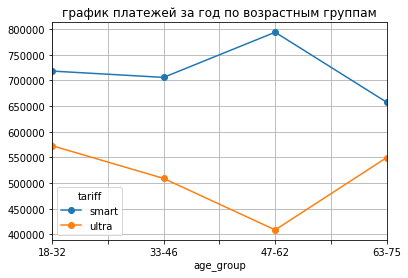

In [48]:
# сводная таблица и график платежей за год по возрастным группам
data_profit.pivot_table(index='age_group', columns='tariff', values='income_pay', aggfunc='sum').plot(style='o-', grid=True, legend=True, title='график платежей за год по возрастным группам')

<div style="border:solid blue 2px; padding: 20px">
    
 
За весь год пользователи за тарифом `smart` по всем возрастным группам платят больше чем за `ultra`
    
- тариф `smart` возрастная группа `47-62` платят больше всех 
       
    
- тариф `ultra` возрастная группа `47-62` платят меньше всех    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `describe()` получим описание тарифа `smart` выборки `data_profit` для признаков
    
`traffic_gb` `sum_calls_duration` `messages_count` `income_pay` `age`
    
</div> 

In [49]:
# описание данных для тарифа smart
smart = data_profit.query('tariff == "smart"')
smart_describe = smart[['traffic_gb','sum_calls_duration','messages_count','income_pay','age']].describe()
smart_describe

,traffic_gb,sum_calls_duration,messages_count,income_pay,age
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,16.321525,417.747534,33.369058,1289.641704,46.557848
std,5.756167,190.476754,28.230396,818.370799,16.349865
min,0.000000,0.000000,0.000000,550.000000,18.000000
25%,13.000000,282.000000,10.000000,550.000000,32.000000
50%,17.000000,421.500000,28.000000,1021.000000,47.000000
75%,20.000000,545.000000,51.000000,1750.000000,62.000000
max,38.000000,1435.000000,143.000000,6770.000000,75.000000


<div style="border:solid blue 2px; padding: 20px">
    
Пользователи тарифа `smart` составляют `70%` всех клиентов компании "Мегалайн"
    
Это клиенты всех возрастов, в среднем `46-47` лет
    
Они подключились, так как абонентская плата составляет `550` , 
    
и выходят за рамки включёных в тариф услуг
    
- **Включено `500` минут** лимит **ПРЕВЫШЕН** более чем у `75%` расход `545`, `max` `1435`
    
    
- **Включено `50` сообщений** лимит **ПРЕВЫШЕН** более чем у `75%` расход `51`, `max` `143`
    
    
- **Включено `15 ГБ` интернет-трафика** лимит **ПРЕВЫШЕН** более чем у `50%` расход `17`, `max` `38`
    
**СВЕРХЛИМИТНЫЕ ПОСТУПЛЕНИЯ ПО ТАРИФУ `smart` В "МЕГАЛАЙН" ИДУТ ОТ КАЖДОЙ УСЛУГИ**
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `month`   
    
и построим график методом `plot()`
    

    
</div>

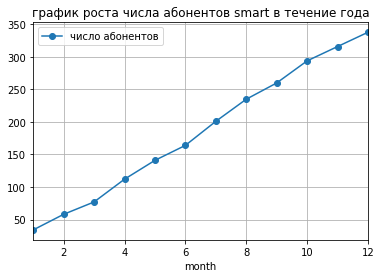

In [50]:
# сводная таблица и график роста числа абонентов smart в течение года
s = smart.pivot_table(index='month', values='income_pay', aggfunc=['sum','count'])
s.columns = ['сумма платежей','число абонентов']
s['число абонентов'].plot(style='o-', grid=True, legend=True, title='график роста числа абонентов smart в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Общее количество платежей по тарифу `smart` рисует растущий тренд
    

    
</div>

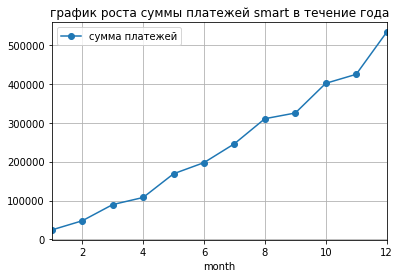

In [51]:
# сводная таблица и график роста суммы платежей по тарифу smart в течение года
s['сумма платежей'].plot(style='o-', grid=True, legend=True, title='график роста суммы платежей smart в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Общая сумма платежей по тарифу `smart` рисует растущий тренд
    

    
</div>

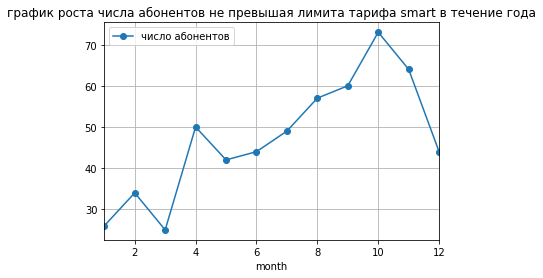

In [52]:
# сводная таблица не превышая лимита тарифа smart и график роста числа абонентов в течение года
s_pay_only_tariff = smart.query('income_pay == 550').pivot_table(index='month', values='income_pay', aggfunc=['sum','count'])
s_pay_only_tariff.columns = ['сумма платежей','число абонентов']
s_pay_only_tariff['число абонентов'].plot(style='o-', grid=True, legend=True, title='график роста числа абонентов не превышая лимита тарифа smart в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Количество платежей не превышая лимита тарифа `smart` 
    
    
- со `2` по `3` месяца показало слабое падение
    
    
- с `4` по `5` месяца показало слабое падение
    
    
- с `10` по `12` месяца показало сильное падение
    

    
</div>

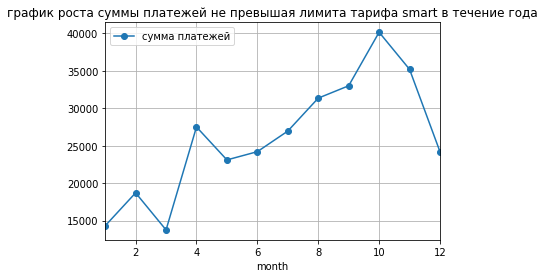

In [53]:
# сводная таблица не превышая лимита тарифа smart и график роста суммы платежей в течение года
s_pay_only_tariff['сумма платежей'].plot(style='o-', grid=True, legend=True, title='график роста суммы платежей не превышая лимита тарифа smart в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Сумма платежей не превышая лимита тарифа `smart` 
    
    
- со `2` по `3` месяца показало слабое падение
    
    
- с `4` по `5` месяца показало слабое падение
    
    
- с `10` по `12` месяца показало сильное падение
    
</div>

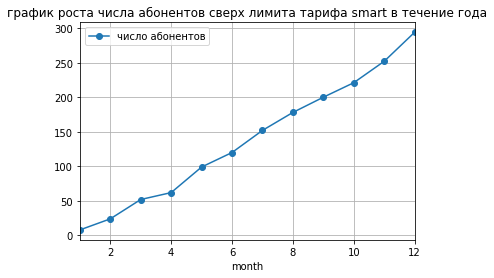

In [54]:
# сводная таблица сверх лимита тарифа smart и график роста числа абонентов в течение года
s_pay_over_tariff = smart.query('income_pay > 550').pivot_table(index='month', values='income_pay', aggfunc=['sum','count'])
s_pay_over_tariff.columns = ['сумма платежей','число абонентов']
s_pay_over_tariff['число абонентов'].plot(style='o-', grid=True, legend=True, title='график роста числа абонентов сверх лимита тарифа smart в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Количество платежей сверх лимита тарифа `smart` рисует растущий тренд
    
    
</div>

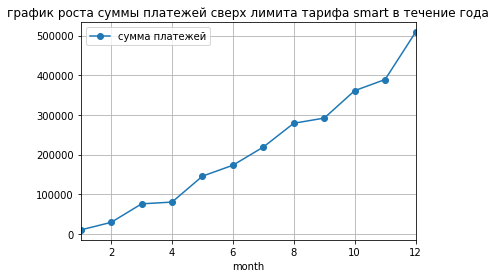

In [55]:
# сводная таблица сверх лимита тарифа smart и график роста суммы платежей в течение года
s_pay_over_tariff['сумма платежей'].plot(style='o-', grid=True, legend=True, title='график роста суммы платежей сверх лимита тарифа smart в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Сумма платежей сверх лимита тарифа `smart` 
    
- с `3` по `4` месяца показало малый прирост
    
    
- с `11` по `12` месяца показало сильный рост
    

    
</div>

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `month`   
    
и построим график методом `plot()`
    

    
</div>

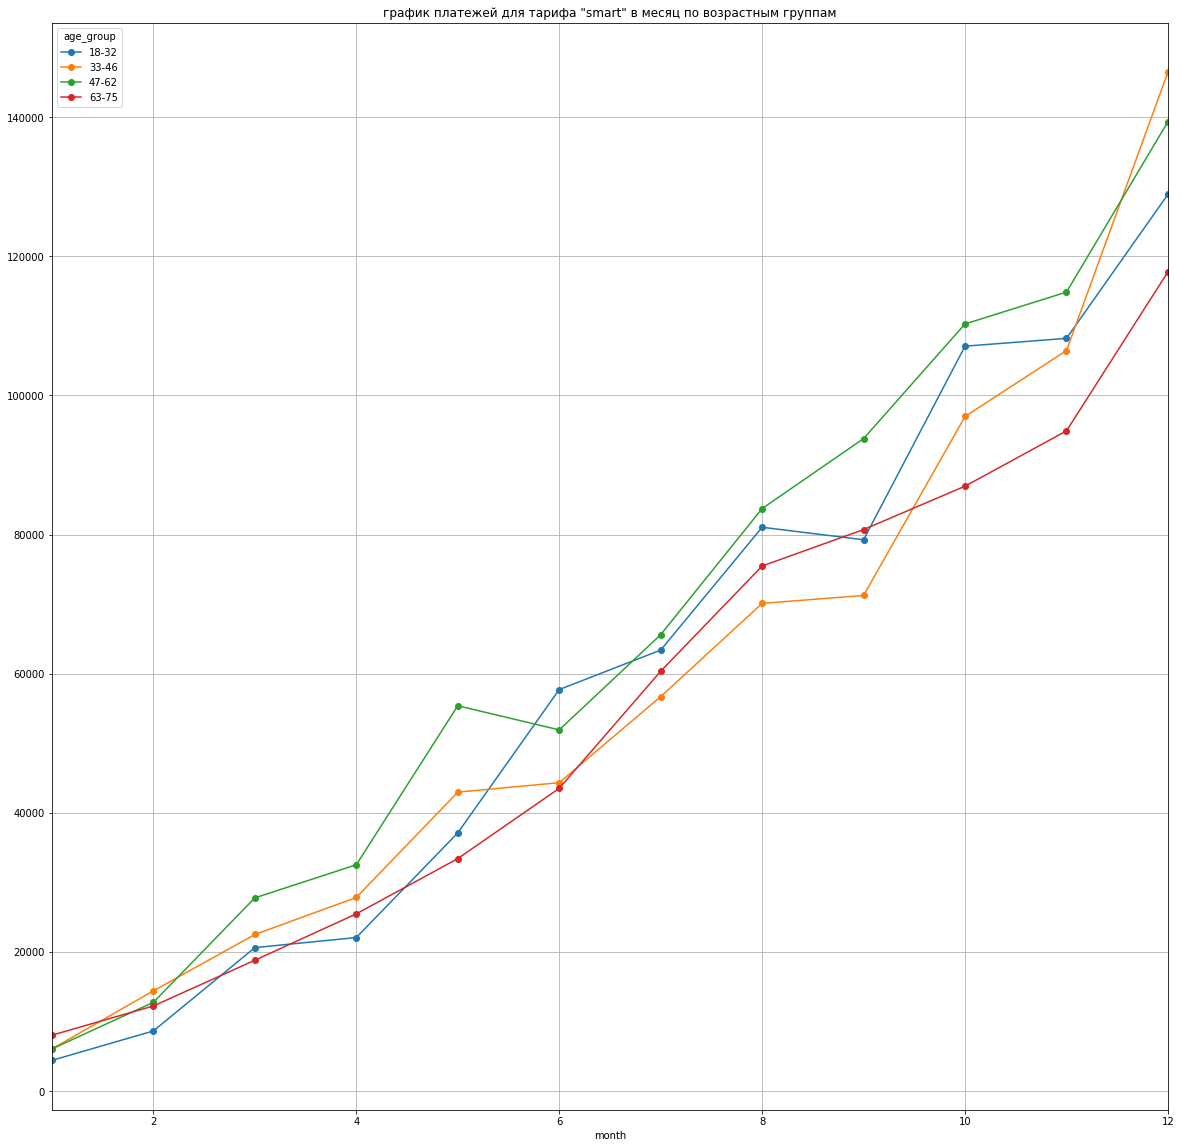

In [56]:
# # сводная таблица и график платежей для тарифа smart в месяц по возрастным группам
smart.pivot_table(index='month', columns='age_group', values='income_pay', aggfunc='sum').plot(style='o-', figsize=(20, 20), grid=True, legend=True, title='график платежей для тарифа "smart" в месяц по возрастным группам')

<div style="border:solid blue 2px; padding: 20px">
    
 
Пользователи тарифа `ultra` во всех возрастных группах платят примерно одинаково в течение года
    
- возрастная группа `47-62` несколько больше остальных в течение года
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `describe()` получим описание тарифа `ultra` выборки `data_profit` для признаков
    
`traffic_gb` `sum_calls_duration` `messages_count` `income_pay` `age`
    
</div> 

In [57]:
# описание данных для тарифа ultra
ultra = data_profit.query('tariff == "ultra"')
ultra_describe = ultra[['traffic_gb','sum_calls_duration','messages_count','income_pay','age']].describe()
ultra_describe

,traffic_gb,sum_calls_duration,messages_count,income_pay,age
count,986.000000,986.000000,986.000000,986.000000,986.000000
mean,19.474645,526.089249,49.313387,2070.030426,46.838742
std,9.868057,317.887549,47.806040,376.015578,17.099807
min,0.000000,0.000000,0.000000,1950.000000,18.000000
25%,12.000000,282.500000,6.000000,1950.000000,30.000000
50%,19.000000,518.000000,38.000000,1950.000000,45.000000
75%,27.000000,751.750000,78.750000,1950.000000,63.000000
max,49.000000,1673.000000,224.000000,4800.000000,75.000000


<div style="border:solid blue 2px; padding: 20px">
    
Пользователи тарифа `ultra` составляют `30%` всех клиентов компании "Мегалайн"
    
Это клиенты всех возрастов, в среднем `45-46` лет
    
Они осмысленно подключились, так как `75%` не выходят за рамки включёных в тариф услуг
    
- **Включено `3000` минут** лимит не превышен, `max` `1673`
    
    
- **Включено `1000` сообщений** лимит не превышен, `max` `224`
    
    
- **Включено `30 ГБ` интернет-трафика** лимит **ПРЕВЫШЕН**, `max` `49`
    
**ВСЕ СВЕРХЛИМИТНЫЕ ПОСТУПЛЕНИЯ ПО ТАРИФУ `ultra` В "МЕГАЛАЙН" ИДУТ ОТ ОПЛАТЫ ЗА ИНТЕРНЕТ-ТРАФИК**
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `month`   
    
и построим график методом `plot()`
    

    
</div>

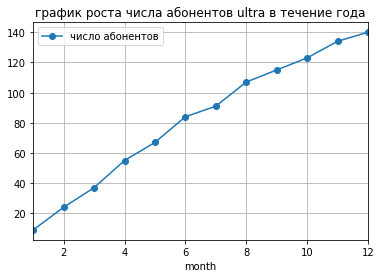

In [58]:
# сводная таблица и график роста числа абонентов по тарифу ultra в течение года
u = ultra.pivot_table(index='month', values='income_pay', aggfunc=['sum','count'])
u.columns = ['сумма платежей','число абонентов']
u['число абонентов'].plot(style='o-', grid=True, legend=True, title='график роста числа абонентов ultra в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Общее количество платежей по тарифу `ultra` рисует растущий тренд
    

    
</div>

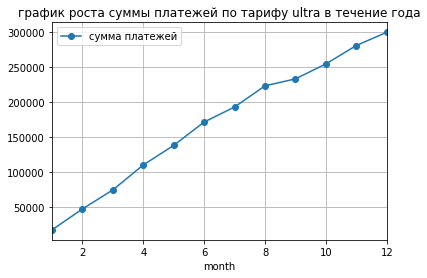

In [59]:
# сводная таблица и график роста суммы платежей по тарифу ultra в течение года
u['сумма платежей'].plot(style='o-', grid=True, legend=True, title='график роста суммы платежей по тарифу ultra в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Общая сумма платежей по тарифу `ultra` рисует растущий тренд
    

    
</div>

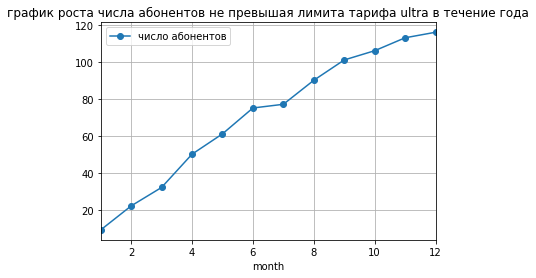

In [60]:
# сводная таблица не превышая лимита тарифа и график роста числа абонентов в течение года
u_pay_only_tariff = ultra.query('income_pay == 1950').pivot_table(index='month', values='income_pay', aggfunc=['sum','count'])
u_pay_only_tariff.columns = ['сумма платежей','число абонентов']
u_pay_only_tariff['число абонентов'].plot(style='o-', grid=True, legend=True, title='график роста числа абонентов не превышая лимита тарифа ultra в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Количество платежей не превышая лимита тарифа `ultra` с `6` по `7` месяца показало малый прирост
    

    
</div>

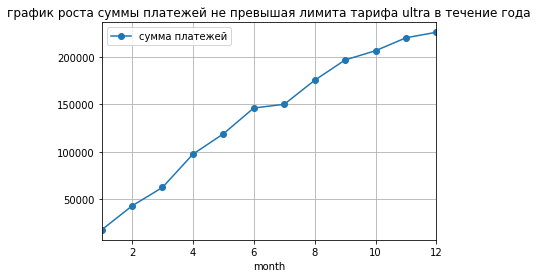

In [61]:
# сводная таблица не превышая лимита тарифа и график роста суммы платежей в течение года
u_pay_only_tariff['сумма платежей'].plot(style='o-', grid=True, legend=True, title='график роста суммы платежей не превышая лимита тарифа ultra в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Сумма платежей не превышая лимита тарифа `ultra` с `6` по `7` месяца показала малый прирост
    

    
</div>

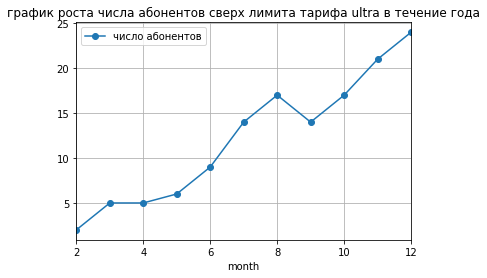

In [62]:
# сводная таблица сверх лимита тарифа ultra и график роста числа абонентов в течение года
u_pay_over_tariff = ultra.query('income_pay > 1950').pivot_table(index='month', values='income_pay', aggfunc=['sum','count'])
u_pay_over_tariff.columns = ['сумма платежей','число абонентов']
u_pay_over_tariff['число абонентов'].plot(style='o-', grid=True, legend=True, title='график роста числа абонентов сверх лимита тарифа ultra в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Количество платежей сверх лимита тарифа `ultra` 
    
- с `3` по `4` месяца показало малый прирост
    
    
- с `8` по `9` месяца показало уменьшение
    

    
</div>

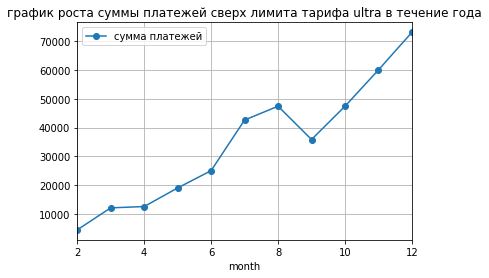

In [63]:
# сводная таблица сверх лимита тарифа ultra и график роста суммы платежей в течение года
u_pay_over_tariff['сумма платежей'].plot(style='o-', grid=True, legend=True, title='график роста суммы платежей сверх лимита тарифа ultra в течение года')

<div style="border:solid blue 2px; padding: 20px">
    

Сумма платежей сверх лимита тарифа `ultra` 
    
- с `3` по `4` месяца показало малый прирост
    
    
- с `8` по `9` месяца показало уменьшение
    

    
</div>

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `month`   
    
и построим график методом `plot()`
    

    
</div>

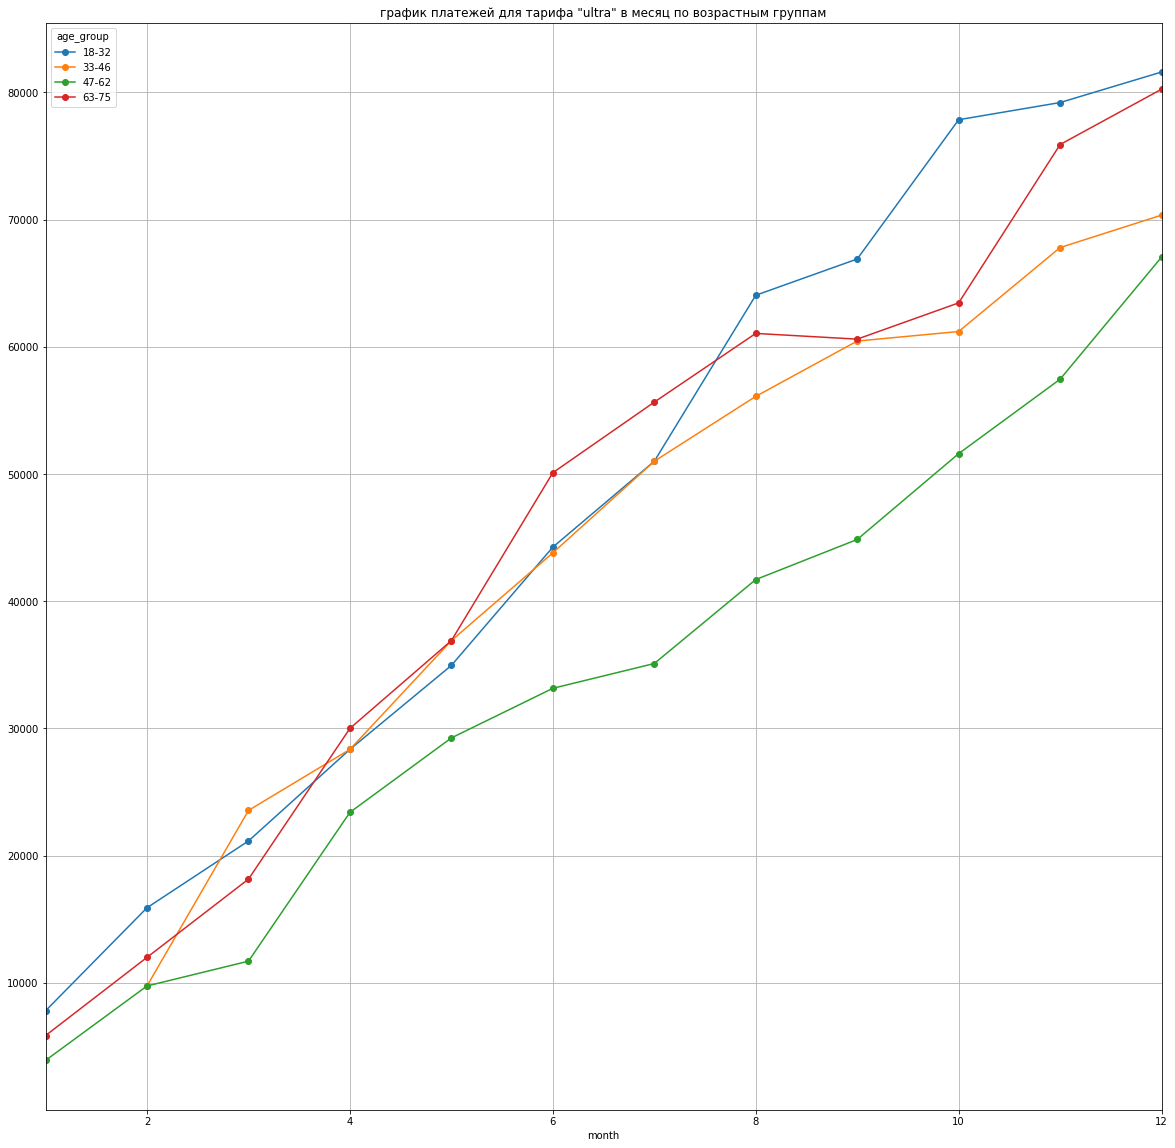

In [64]:
# сводная таблица и график платежей для тарифа ultra в месяц по возрастным группам
ultra.pivot_table(index='month', columns='age_group', values='income_pay', aggfunc='sum').plot(style='o-', figsize=(20, 20), grid=True, legend=True, title='график платежей для тарифа "ultra" в месяц по возрастным группам')

<div style="border:solid blue 2px; padding: 20px">
    
 
Пользователи тарифа `ultra` в возрастной группе `47-62` платят меньше остальных в течение года
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `boxplot()` поcтроим диаграмму размаха
    
    
</div> 

(0, 50)

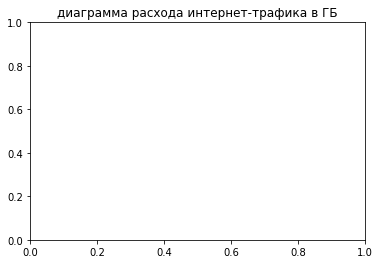

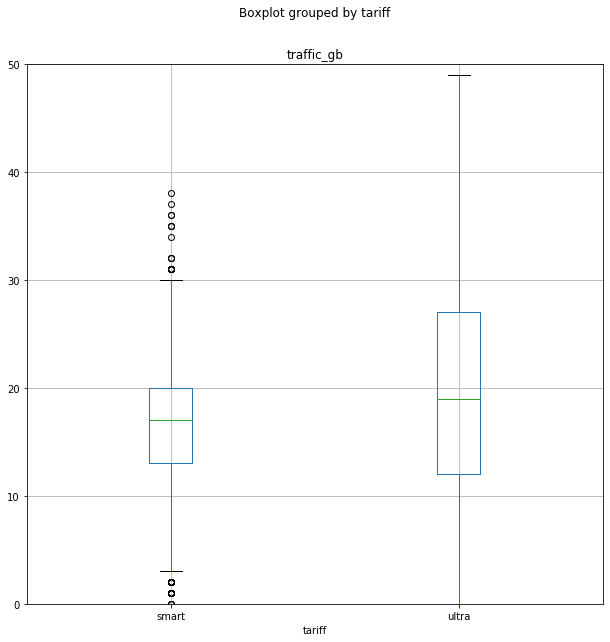

In [65]:
# диаграмма размаха
plt.title('диаграмма расхода интернет-трафика в ГБ')
data_profit.boxplot(column=['traffic_gb'], by='tariff', figsize=(10,10), grid=True).set_ylim(0,50)

<div style="border:solid blue 2px; padding: 20px">
    
 
- Расход интернет-трафика в ГБ по тарифу `smart` присутствуют выбросы в обе стороны
    
    
- Расход интернет-трафика в ГБ по тарифу `ultra` все значения нормальные
    
    
</div> 

(0, 1700)

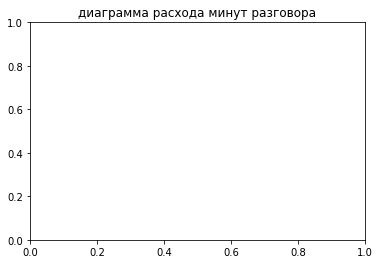

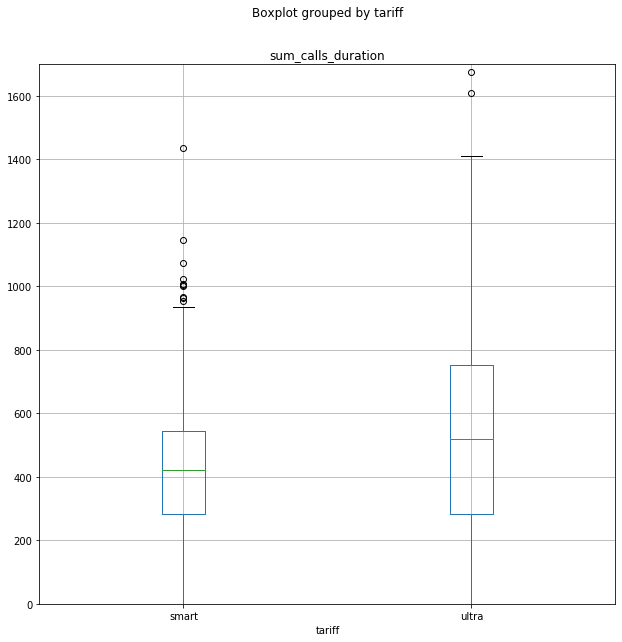

In [66]:
# диаграмма размаха
plt.title('диаграмма расхода минут разговора')
data_profit.boxplot(column='sum_calls_duration', by='tariff', figsize=(10,10), grid=True).set_ylim(0,1700)

<div style="border:solid blue 2px; padding: 20px">
    
 
- Расход минут разговора по тарифу `smart` присутствуют выбросы на увеличение расхода
    
    
- Расход минут разговора по тарифу `ultra` присутствуют выбросы на увеличение расхода
    
    
</div> 

(0, 230)

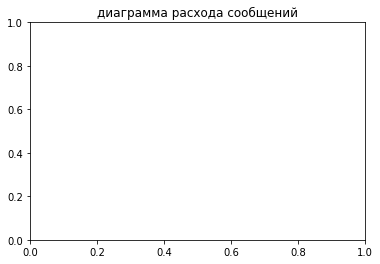

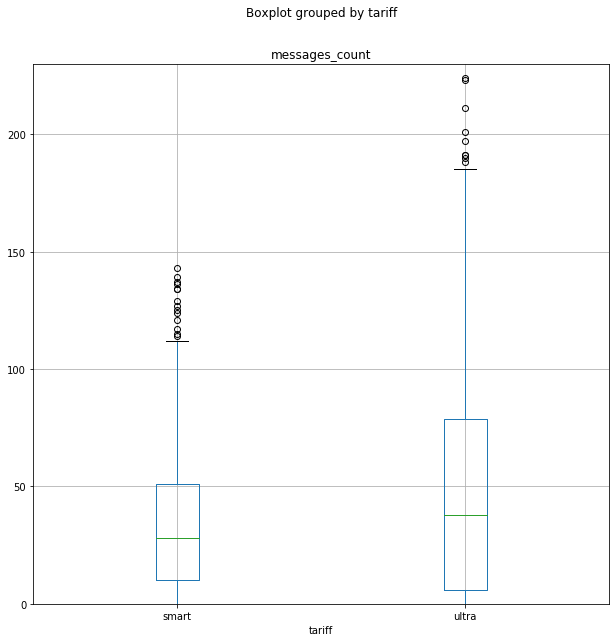

In [67]:
# диаграмма размаха
plt.title('диаграмма расхода сообщений')
data_profit.boxplot(column='messages_count', by='tariff', figsize=(10,10), grid=True).set_ylim(0,230)

<div style="border:solid blue 2px; padding: 20px">
    
 
- Расход сообщений по тарифу `smart` присутствуют выбросы на увеличение расхода
    
    
- Расход сообщений по тарифу `ultra` присутствуют выбросы на увеличение расхода
    
    
</div> 

(0, 7000)

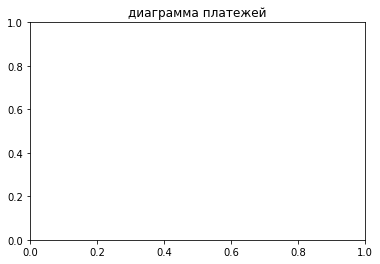

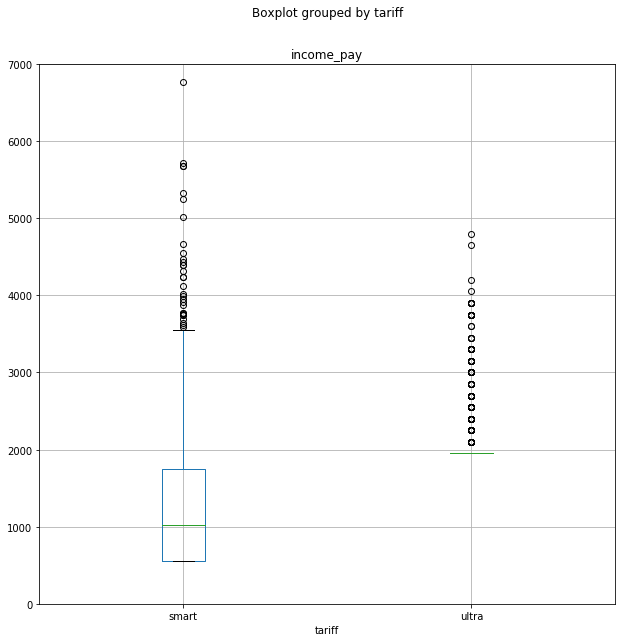

In [68]:
# диаграмма размаха
plt.title('диаграмма платежей')
data_profit.boxplot(column='income_pay', by='tariff', figsize=(10,10), grid=True).set_ylim(0,7000)

<div style="border:solid blue 2px; padding: 20px">
    
 
- Платежи по тарифу `smart` присутствуют выбросы по увеличению платежей
    
    
- Платежи по тарифу `ultra` присутствуют выбросы по увеличению платежей
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `month`   
    
и количество минут разговора по тарифу `smart` требуемых в месяц
    

    
</div>

In [69]:
# сводная таблица
smart.pivot_table(index='month', values='sum_calls_duration', aggfunc='sum')

,sum_calls_duration
month,
1,6931
2,17324
3,30034
4,41119
5,54618
6,64885
7,82079
8,99045
9,111439


<div style="border:solid blue 2px; padding: 20px">
    

Количество минут разговора по тарифу `smart` требуемых в месяц постоянно растёт
    

    
</div>

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `month`   
    
и количество минут разговора по тарифу `ultra` требуемых в месяц
    

    
</div>

In [70]:
# сводная таблица
ultra.pivot_table(index='month', values='sum_calls_duration', aggfunc='sum')

,sum_calls_duration
month,
1,3853
2,7131
3,18117
4,25191
5,34192
6,40295
7,49667
8,54653
9,62036


<div style="border:solid blue 2px; padding: 20px">
    

Количество минут разговора по тарифу `ultra` требуемых в месяц постоянно растёт
    

    
</div>

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `month`   
    
и количество сообщений по тарифу `smart` требуемых в месяц
    

    
</div>

In [71]:
# сводная таблица
smart.pivot_table(index='month', values='messages_count', aggfunc='sum')

,messages_count
month,
1,620
2,1397
3,2453
4,3443
5,4762
6,5478
7,6784
8,7905
9,8746


<div style="border:solid blue 2px; padding: 20px">
    

Количество сообщений по тарифу `smart` требуемых в месяц постоянно растёт
    

    
</div>

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `month`   
    
и количество сообщений по тарифу `ultra` требуемых в месяц
    

    
</div>

In [72]:
# сводная таблица
ultra.pivot_table(index='month', values='messages_count', aggfunc='sum')

,messages_count
month,
1,304
2,527
3,1195
4,1736
5,2536
6,3505
7,4536
8,5183
9,6013


<div style="border:solid blue 2px; padding: 20px">
    

Количество сообщений по тарифу `ultra` требуемых в месяц постоянно растёт
    

    
</div>

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `month`   
    
и объём интернет-трафика по тарифу `smart` требуемого в месяц
    

    
</div>

In [73]:
# сводная таблица
smart.pivot_table(index='month', values='traffic_gb', aggfunc='sum')

,traffic_gb
month,
1,297
2,687
3,1173
4,1526
5,2243
6,2616
7,3191
8,3933
9,4262


<div style="border:solid blue 2px; padding: 20px">
    

объём интернет-трафика по тарифу `smart` требуемого в месяц постоянно растёт
    

    
</div>

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `month`   
    
и объём интернет-трафика по тарифу `ultra` требуемого в месяц
    

    
</div>

In [74]:
# сводная таблица
ultra.pivot_table(index='month', values='traffic_gb', aggfunc='sum')

,traffic_gb
month,
1,119
2,288
3,653
4,933
5,1298
6,1591
7,1866
8,2097
9,2213


<div style="border:solid blue 2px; padding: 20px">
    

объём интернет-трафика по тарифу `ultra` требуемого в месяц постоянно растёт
    

    
</div>

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `tariff`   
    
и для минут разговора по тарифу `smart` и `ultra` 
    
посчитаем среднее количество `mean`, дисперсию `var`, стандартное отклонение `std`
    

    
</div>

In [75]:
# сводная таблица
data_profit_mvs_calls_duration = data_profit.pivot_table(index='tariff', values='sum_calls_duration', aggfunc=['mean','var','std'])
data_profit_mvs_calls_duration.columns = ['mean_calls_duration','variance_calls_duration','std_calls_duration']
data_profit_mvs_calls_duration

,mean_calls_duration,variance_calls_duration,std_calls_duration
tariff,,,
smart,417.747534,36281.393836,190.476754
ultra,526.089249,101052.493549,317.887549


<div style="border:solid blue 2px; padding: 20px">
    

Минуты разговора по тарифу `smart`
    
среднее количество `mean` меньше, дисперсия `var` низкая , стандартное отклонение `std` меньше
    
Минуты разговора по тарифу `ultra`
    
дисперсия `var` высокая значения сильно разбросаны
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `tariff`   
    
и для сообщений по тарифу `smart` и `ultra` 
    
посчитаем среднее количество `mean`, дисперсию `var`, стандартное отклонение `std`
    

    
</div>

In [76]:
# сводная таблица
data_profit_mvs_messages = data_profit.pivot_table(index='tariff', values='messages_count', aggfunc=['mean','var','std'])
data_profit_mvs_messages.columns = ['mean_messages','variance_messages','std_messages']
data_profit_mvs_messages

,mean_messages,variance_messages,std_messages
tariff,,,
smart,33.369058,796.955256,28.230396
ultra,49.313387,2285.417425,47.806040


<div style="border:solid blue 2px; padding: 20px">
    

Сообщения по тарифу `smart`
    
среднее количество `mean` меньше, дисперсия `var` низкая , стандартное отклонение `std` меньше
    
Сообщения по тарифу `ultra`
    
дисперсия `var` высокая значения сильно разбросаны
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    

Методом `pivot_table()` получим сводную таблицу по `tariff`   
    
и для объёма интернет-трафика по тарифу `smart` и `ultra` 
    
посчитаем среднее количество `mean`, дисперсию `var`, стандартное отклонение `std`
    

    
</div>

In [77]:
# сводная таблица
data_profit_mvs_traffic_gb = data_profit.pivot_table(index='tariff', values='traffic_gb', aggfunc=['mean','var','std'])
data_profit_mvs_traffic_gb.columns = ['mean_traffic_gb','variance_traffic_gb','std_traffic_gb']
data_profit_mvs_traffic_gb

,mean_traffic_gb,variance_traffic_gb,std_traffic_gb
tariff,,,
smart,16.321525,33.133453,5.756167
ultra,19.474645,97.378544,9.868057


<div style="border:solid blue 2px; padding: 20px">
    

Объёма интернет-трафика по тарифу `smart`
    
среднее количество `mean` меньше, дисперсия `var` ниже , стандартное отклонение `std` меньше
    
Объёма интернет-трафика по тарифу `ultra`
    
дисперсия `var` больше значения не сильно разбросаны
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
Методом `hist()` построим гистограмму для объёма интернет-трафика по тарифу `smart`
    
    
</div> 

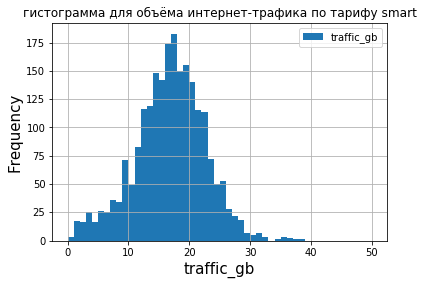

In [78]:
# построение гистограммы
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('traffic_gb', fontsize=15)
smart['traffic_gb'].plot.hist(bins=50, range=(0, 50), grid=True, legend=True, title='гистограмма для объёма интернет-трафика по тарифу smart')

<div style="border:solid blue 2px; padding: 20px">
    
Объёма интернет-трафика по тарифу `smart` распределён
    
- от `12` до `22` в большем количестве
    
- от `0` до `11` и от `23` до `28` в среднем количестве
    
- от `29` до `38 в меньшем количестве
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Методом `hist()` построим гистограмму для объёма интернет-трафика по тарифу `ultra`
    
    
</div> 

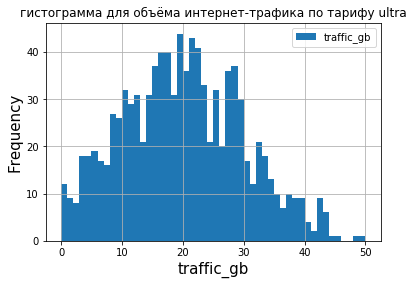

In [79]:
# построение гистограммы
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('traffic_gb', fontsize=15)
ultra['traffic_gb'].plot.hist(bins=50, range=(0, 50), grid=True, legend=True, title='гистограмма для объёма интернет-трафика по тарифу ultra')

<div style="border:solid blue 2px; padding: 20px">
    
Объёма интернет-трафика по тарифу `ultra` распределён
    
- от `10` до `30` в большем количестве
    
- от `0` до `9` и от `31` до `39` в среднем количестве
    
- от `40` до `49 в меньшем количестве
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Методом `hist()` построим гистограмму для минут разговора по тарифу `smart`
    
    
</div> 

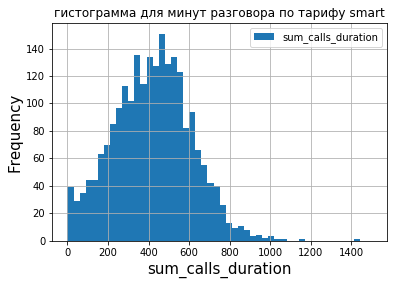

In [80]:
# построение гистограммы
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('sum_calls_duration', fontsize=15)
smart['sum_calls_duration'].plot.hist(bins=50, range=(0, 1500), grid=True, legend=True, title='гистограмма для минут разговора по тарифу smart')

<div style="border:solid blue 2px; padding: 20px">
    
Минуты разговора по тарифу `smart` распределены
    
- от `350` до `580` в большем количестве
    
- от `0` до `200` и от `590` до `750` в среднем количестве
    
- от `760` до `1435` в меньшем количестве
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Методом `hist()` построим гистограмму для минут разговора по тарифу `ultra`
    
    
</div> 

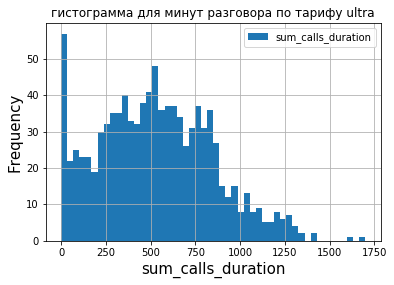

In [81]:
# построение гистограммы
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('sum_calls_duration', fontsize=15)
ultra['sum_calls_duration'].plot.hist(bins=50, range=(0, 1700), grid=True, legend=True, title='гистограмма для минут разговора по тарифу ultra')

<div style="border:solid blue 2px; padding: 20px">
    
Минуты разговора по тарифу `ultra` распределены
    
    
- `0` много пользователей не применяют услугу разговора, используется устройствами для web-доступа    
    
- от `250` до `850` в большем количестве
    
- до `250` в среднем количестве
    
- от `850` до `1670` в меньшем количестве
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Методом `hist()` построим гистограмму для сообщений по тарифу `smart`
    
    
</div> 

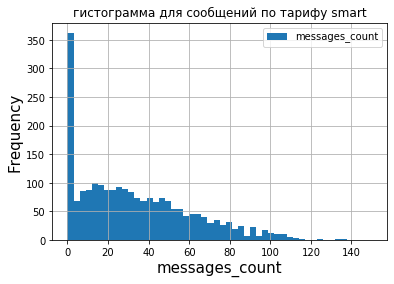

In [82]:
# построение гистограммы
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('messages_count', fontsize=15)
smart['messages_count'].plot.hist(bins=50, range=(0, 150), grid=True, legend=True, title='гистограмма для сообщений по тарифу smart')

<div style="border:solid blue 2px; padding: 20px">
    
Сообщения по тарифу `smart` распределены
    
- `0` много пользователей не применяют услугу отправки сообщений
    
- от `1` до `50` в большем количестве
    
- от `50` до `100` в среднем количестве
    
- от `100` до `143` в меньшем количестве
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Методом `hist()` построим гистограмму для сообщений по тарифу `ultra`
    
    
</div> 

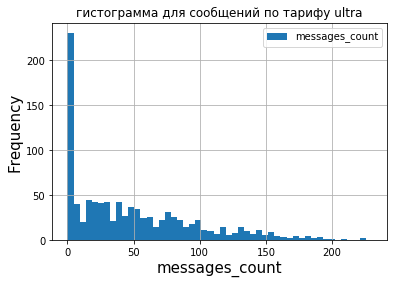

In [83]:
# построение гистограммы
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('messages_count', fontsize=15)
ultra['messages_count'].plot.hist(bins=50, range=(0, 230), grid=True, legend=True, title='гистограмма для сообщений по тарифу ultra')

<div style="border:solid blue 2px; padding: 20px">
    
Сообщения по тарифу `ultra` распределены
    
- `0` много пользователей не применяют услугу отправки сообщений
    
- от `1` до `60` в большем количестве
    
- от `60` до `100` в среднем количестве
    
- от `100` до `220` в меньшем количестве
    
    
</div> 

## Гипотезы

<div style="border:solid blue 2px; padding: 20px">
    
**Гипотеза о различии средних двух выборок независимых между собой**
    
средняя выручка пользователей тарифов `ultra` и `smart` различаются
    
    
**Проведём статистический тест**
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Методом `scipy.stats.ttest_ind` проверим гипотезу о различии среднего двух выборок
    
**Нулевая гипотеза `h0`** средняя выручка пользователей тарифов `ultra` и `smart` **`равны`**
    
    
**Альтернативная гипотеза `h1`** средняя выручка пользователей тарифов `ultra` и `smart` **`различаются`**
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Пороговое значение зададим `alpha` `=`  `0.05`
    
    
**Центральная предельная теорема**
    
Выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. 
    
Это значит, что если взять все возможные выборки определённого размера и посчитать их средние,
    
получим датасет, колоколообразно распределённый вокруг истинного среднего.
    
альтернативная гипотеза называется двусторонней
  
**Альтернативная гипотеза `h1` называется двусторонней**  
    
**Уровень значимости** — это суммарная вероятность того,
    
что измеренное эмпирически значение окажется далеко от среднего 
    
и составляет 5%, по 2.5% с каждой стороны.

    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Получим ответы
    
    
- **Нулевую гипотезу `h0`** отвергаем
    
  
- **Нулевую гипотезу `h0`** не получилось отвергнуть    

    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Для нормальных распределений верно правило трёх стандартных отклонений или правило `3σ`
    
Это правило позволяет не только находить интервал, 
    
куда наверняка попадут практически все значения интересующей нас переменной, 
    
но и искать значения вне этого интервала. 
    
Их называют выбросами `outliers`

    
</div> 

In [84]:
# исключение выбросов
def outliers(data, column, graphic=0, x = 10, y = 10):
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (data[column] >= (q1 - 1.5 * iqr)) & (data[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return data.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return data.loc[iqr_test]
smart = outliers(smart, 'income_pay', 0)
ultra = outliers(ultra, 'income_pay', 0)

In [85]:
# получение массивов для теста
ultra_array = ultra['income_pay']
smart_array = smart['income_pay']

In [86]:
# проверка гипотезы
alpha = 0.05
results = st.ttest_ind(ultra_array, smart_array)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.1080242236586082e-155
Отвергаем нулевую гипотезу


<div style="border:solid blue 2px; padding: 20px">
    
    
Получили ответ
    
    
- **Нулевую гипотезу `h0`** отвергаем
    
  
Гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно.
    
Значит данные различаются.

    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
**Гипотеза о различии средних двух выборок независимых между собой**
    
средняя выручка пользователей из `Москвы` и `регионов` различаются
    
    
**Проведём статистический тест**
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Методом `scipy.stats.ttest_ind` проверим гипотезу о различии среднего двух выборок
    
**Нулевая гипотеза `h0`** средняя выручка пользователей из `Москвы` и `регионов` **`равны`**
    
    
**Альтернативная гипотеза `h1`** средняя выручка пользователей из `Москвы` и `регионов` **`различаются`**
    
    
</div> 

In [87]:
# получение массивов для теста
moscow = data_profit.query('city == "Москва"')
region = data_profit.query('city != "Москва"')

In [88]:
# исключение выбросов
moscow = outliers(moscow, 'income_pay', 0)
region = outliers(region, 'income_pay', 0)

In [89]:
# получение массивов для теста
moscow_array = moscow['income_pay']
region_array = region['income_pay']

In [90]:
# проверка гипотезы
alpha = 0.05
results = st.ttest_ind(moscow_array, region_array)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.29144177734462323
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid blue 2px; padding: 20px">
    
    
Получили ответ
    
    
- **Нулевую гипотезу `h0`** не получилось отвергнуть
    

- `p-значение` `29%` это явно слишком большая вероятность чтобы делать вывод о значимом различии
   
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
Получили ответ
    
    
- **средняя выручка пользователей тарифов `ultra` и `smart` различаются** 
    
  Гипотеза подтвердилась.
    
  Выручка по тарифам отличается. 
    
  Средняя выручка по тарифу `ultra`  больше, чем от Smart.
    

- `p-значение` `29%` это явно слишком большая вероятность чтобы делать вывод о значимом различии
   
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
    
## Вывод
    
    
Пользователи, подключающие разные тарифы, решают разные пракические задачи:
    
Используя услуги по интернет-трафику тарифа `ultra` и при этом не используя звонки и сообщения
    
при абонентской плате `1950 рублей` в месяц платят по факту `65 рублей за ГБ` и не переступают лимит
    
Они могли бы использовать тариф `smart` при тех же условиях `36 рублей за ГБ`
    

Наблюдение расходов по тарифам у разных категорий возрастов выделило группу [`42-67`](#plot)
    
    
которые применют тариф `ultra` в рамках лимита лучше остальных
    

    
    
- **средняя выручка от пользователей тарифов `ultra` на `60%` больше `smart`** 
    

- **можно дать рекомендацию бизнесу скоректировать рекламный бюджет в сторону тарифа `ultra`**
    
  Получится при увеличении количества пользователей тарифа `ultra` можно будет продавать
    
  интернет-трафик, который пользуется большим спросом из всех услуг, по более выгодной цене.
   
    
</div> 